# Lesson 31 and 32: Practice with hacker stats *solution*

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l31_32_practice_with_hackerstats_solution.ipynb).*

<br /><br />

In [1]:
import numpy as np
import pandas as pd

import altair as alt

import bootcamp_utils

## Practice 1: Writing a function to draw bootstrap replicates

As you can imagine, it is quite useful to be able to generate, or "draw," bootstrap replicates. Now, you will write a function, `draw_bs_reps()` to do this automatically. You will want to include this in a module so you can use it over and over again. (I will not be providing it in the `bootcamp_utils` module; I want you to write this yourself.)

>1. Define a function with call signature `draw_bs_reps(data, func=np.mean, size=1)`, where `func` is a function that takes in an array and returns a statistic. Examples that could be passed in as `func` are `np.mean`, `np.std`, `np.median`, or a user-defined function. `size` is the number of replicates to generate.
2. Write a good doc string.
3. Define `n` to be the length of the input `data` array.
4. Use a list comprehension to compute a list of bootstrap replicates.
5. Return the replicates as a Numpy array.

If you like, you can use the [`bs_replicate()` function](l31_hackerstats.html#Aside:-list-comprehensions) from the previous lesson.

Now that you have the function, feel free to play around with it and compute bootstrap replicates with the finch beak or other data you want to play with. This is a function you may use over and over again in your research, so you might want to keep it in a module you will use going forward. *Or, you can install the `dc_stat_think` module that I wrote using `pip`, which has this and many other useful functions for bootstrapping.*

### Solution 1

I show the function below.

In [2]:
def draw_bs_reps(data, func=np.mean, size=1):
    """Draw bootstrap replicates from a data set."""
    return np.array([func(np.random.choice(data, replace=True, size=len(data))) 
                         for _ in range(size)])

Let's try this function out on the beak depth data from 1975 to get bootstrap replicates of the mean.

In [3]:
df = pd.read_csv('data/grant_1975.csv', comment='#')
bd_1975 = df['Beak depth, mm'].values

# Compute replicates
bs_reps = draw_bs_reps(bd_1975, np.mean, size=100000)

# 95% confidence interval
print(np.percentile(bs_reps, [2.5, 97.5]))

[9.0566005  9.19491315]


Nice!

<br />

## Practice 2: Plot ECDFs of bootstrap samples

To help you visualize how bootstrap samples can show what you might expect by repeating experiments, we will make a plot of ECDFs of lots of bootstrap samples.

>1. Load in the beak depth data from 1975.
2. Generate the `x` and `y` values for the ECDF of the data and plot them as before. Plot them with opacity = 0.3.
3. Write a **`for`** loop to do the following 100 times:
    * Generate a bootstrap sample from the data set using `np.random.choice()`.
    * Compute the `x` and `y` values for the ECDF of the bootstrap sample.
    * Add these samples to a `DataFrame`.
4. Plot the bootstrap sample ECDFs in a different color with opacity = 0.01.

In order to do this, you will need to allow for a larger data frame for your plot using
```python
alt.data_transformers.enable('default', max_rows=None)
```
or by using
```python
alt.data_transformers.enable('json')
```
Be aware of [the caveats of that](l28_plotting_time_series_generated_data_and_ecdfs#Handling-large-data-sets-with-Altair), though.

### Solution 2

I proceed to do the calculation with the data already loaded.

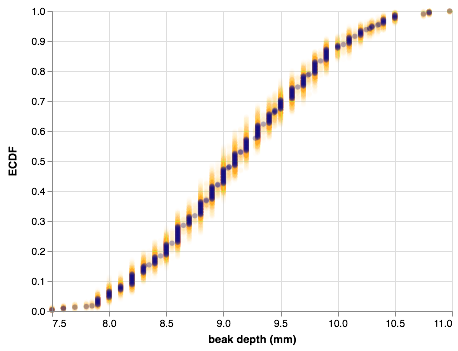

In [4]:
alt.data_transformers.enable('default', max_rows=None)

# Compute ECDF of real data
x, y = bootcamp_utils.ecdf_vals(bd_1975)
df_original = pd.DataFrame(data={'beak depth (mm)': x,
                                'ECDF': y}) 

# Compute bootstrap samples
df_bs_list = []
for _ in range(100):
    bs_sample = np.random.choice(bd_1975, len(bd_1975))
    x, y = bootcamp_utils.ecdf_vals(bs_sample)
    df_bs_list.append(pd.DataFrame(data={'beak depth (mm)': x,
                                         'ECDF': y}))
df_bs = pd.concat(df_bs_list, ignore_index=True)
    
# Plot the ECDFs
original = alt.Chart(df_original
    ).mark_point(
        color='darkblue',
        opacity=0.3,
        filled=True
    ).encode(x=alt.X('beak depth (mm):Q', scale=alt.Scale(zero=False)),
             y='ECDF:Q')

bootstrap = alt.Chart(df_bs
    ).mark_point(
        color='orange',
        opacity=0.01,
        filled=True
    ).encode(x=alt.X('beak depth (mm):Q', scale=alt.Scale(zero=False)),
             y='ECDF:Q')

bootstrap + original

The plot shows the kind of variation you might expect if you were to repeat the measurements again and again.